<a href="https://colab.research.google.com/github/ERIC10000/DiabetesPredictionMLClassification/blob/main/MLClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Supervised Machine Learning
It deals with labelled data, where the Outcome Variable Y is present in the Dataset. It is sometimes considered to be expensive and time consuming because the dataset has to be labelled.

#### Classification
It occurs when the Labels are categorical in nature and can be used on several applications e,g

1. Healthcare: Used Disease Diagnosis, e,g tumors, drug discovery, patient risk assessment.

2. Finance : Fraud Detection, Credit Scoring, Algorithmic Trading.

### Regression
It occurs when the labels are contionous, having the following applications

1. Finance: Stock Price Prediction, Risk Management, Economic Forecasting

2. Real Estate: Property Valuation, Rental Price Prediction

3. Sales and Marketting: Sales forecasting, Costomer Lifetime Value(CLV).

In [ ]:
# CLASSIFICATION
# SUPERVISED LEARNING
# DIABETES PREDICTION IN PATIENTS
# PIMA INDIANS DIABETES DATASET.
# CONSTRAINTS:
# 1. All Patients are Females
# 2. All Patients were Above 21 Years

In [1]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# statistical analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Checking the empties
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

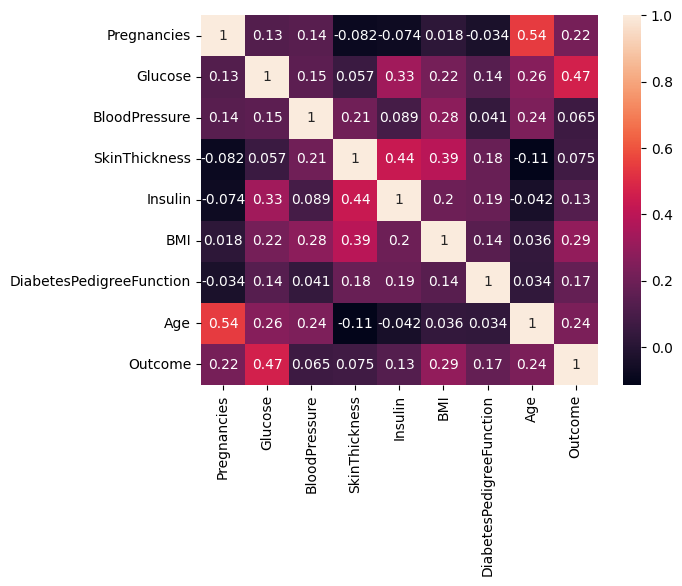

In [6]:
# correlation analysis(numerical columns)
sns.heatmap(df.corr(),annot=True)


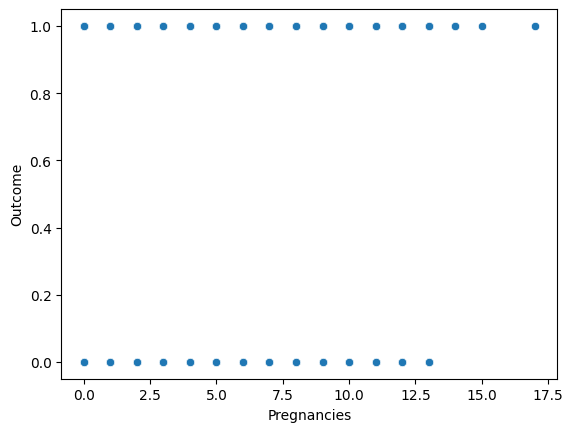

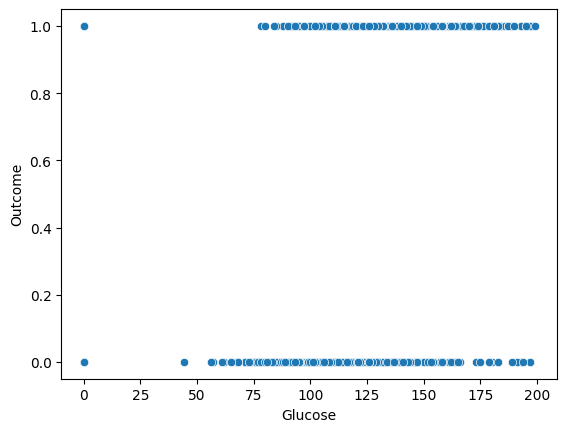

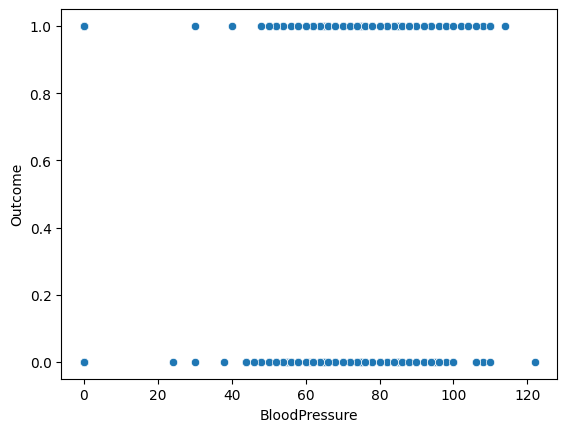

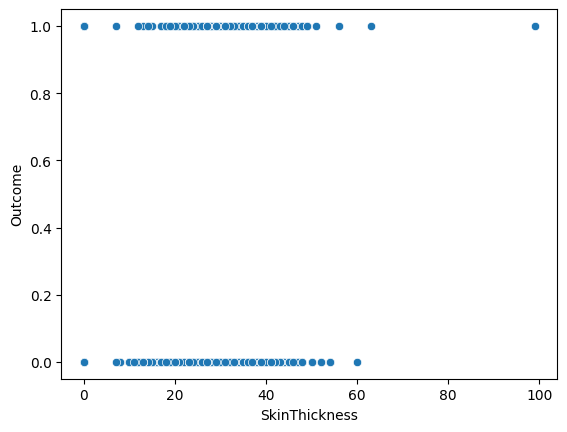

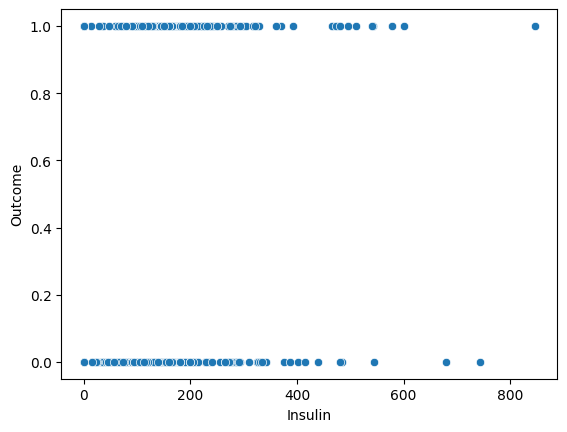

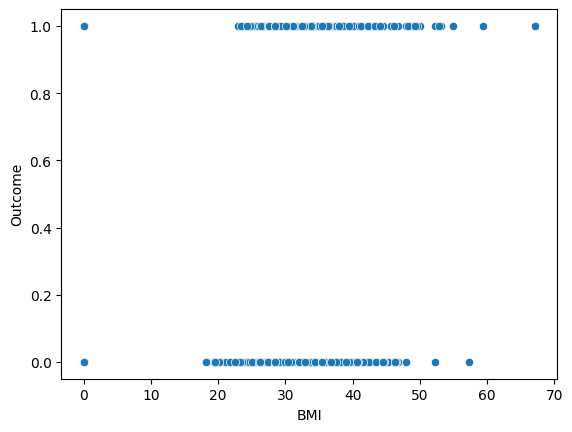

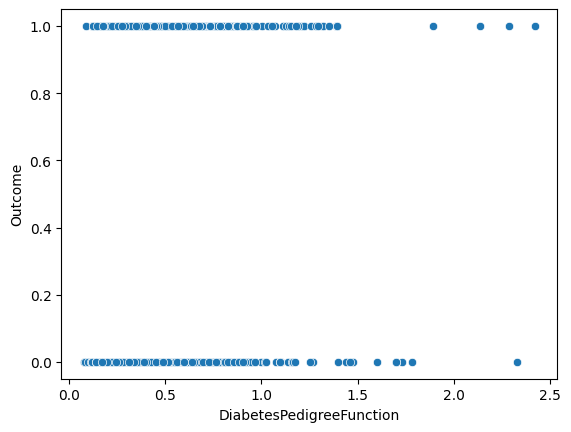

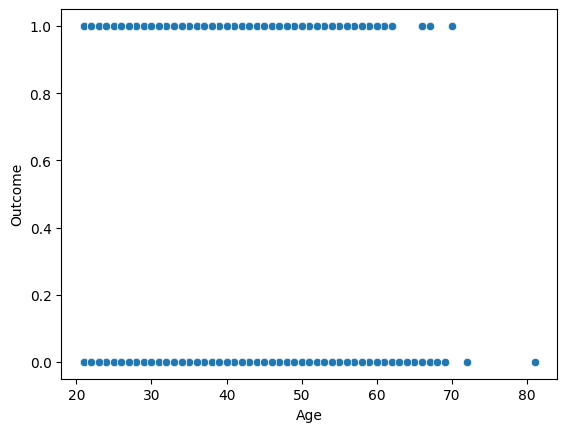

In [7]:
# Bi-Variant Analysis Between the Outcome and All the Predictor
# Scatter PLot

for i in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    sns.scatterplot(x = i, y= 'Outcome', data = df)
    plt.show()

In [8]:
# Classification: Outcome must be Categorical(Text)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [9]:
# Label Encoding-> replace()
# 1: YES
# 0: NO

df['Outcome'] = df['Outcome'].replace({
    1:'YES',
    0:'NO'
})

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


<Axes: >

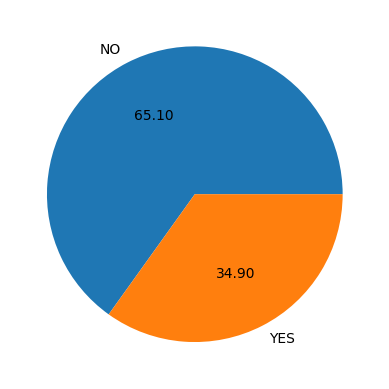

In [12]:
# PIE CHART DISTRIBUTION OF OUTCOME
df.groupby('Outcome').size().plot(kind='pie', autopct= '%.2f')

In [13]:
# MACHINE LEARNING
# SL-CLASSIFICATION
# STEP1: DIVIDE DATASET INTO X-FEATURES AND Y-OUTCOME
df.shape

(768, 9)

In [15]:
array = df.values
X = array[:,0:8]
X.shape

(768, 8)

In [16]:
Y = array[:, 8]
Y.shape

(768,)

In [17]:
# STEP2: DIVIDE THE RECORDS INTO TRAINING AND TESTING SETS
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.3, random_state=42)

In [18]:
X_train.shape

(537, 8)

In [19]:
X_test.shape

(231, 8)

In [20]:
Y_train.shape

(537,)

In [21]:
# STEP3: SCIENTIFIC ALGORITHMS
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [22]:
# STEP4: MODEL TRAINING
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
# STEP5: MODEL EVALUATION
result = model.score(X_test, Y_test)
result

0.6926406926406926

In [24]:
predictions = model.predict(X_test)
predictions

array(['YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES',
       'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO',
  

In [25]:
Y_test

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO'

In [26]:
# ACCURACY SCORE
from sklearn.metrics import accuracy_score
accuracy_score(predictions, Y_test)

0.6926406926406926

In [42]:
# PREDICTIONS:
features = [[6, 108, 72, 35, 600, 53, 0.06, 65]]
outcome = model.predict(features)
print(f"69 Percent Likely to be {outcome}")

69 Percent Likely to be ['NO']


In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000
